In [44]:
import numpy as np
import astropy.io.ascii as at
import matplotlib.pyplot as plt
%matplotlib inline
from astroML import time_series

# For now, make sure hypra is on the k2 branch!
import hypra.prot.fix_kepler
import hypra.prot.time_series
reload(hypra.prot.time_series)

from k2spin import lc
from k2spin import k2io
from k2spin import plot

First, read in the lightcurve and run necessary corrections

In [45]:
lc_dir = "/home/stephanie/code/python/k2spin/lcs/"
#filename = "EPIC_202521690_xy_ap5.0_3.0_fixbox.dat"
filename = "EPIC_202593561_xy_ap5.0_3.0_fixbox.dat"


lc_out = k2io.read_double_aperture(lc_dir+filename)
time, fluxes, unc_fluxes, x_pos, y_pos, qual_flux, apertures = lc_out
    
light_curve = lc.LightCurve(time, fluxes[1], unc_fluxes[1], x_pos, y_pos,
                                name=filename[:-4])
#light_curve.choose_initial()
#light_curve.correct_and_fit()


t = light_curve.time
y = light_curve.flux
dy = light_curve.unc_flux


In [46]:
cadence = np.median(np.diff(t))
print cadence

0.0204317400003


Let's try the raw lightcurve

2.7787166400376009

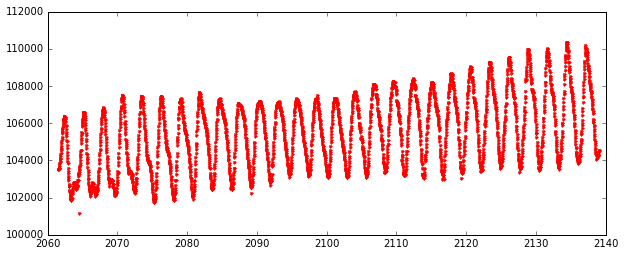

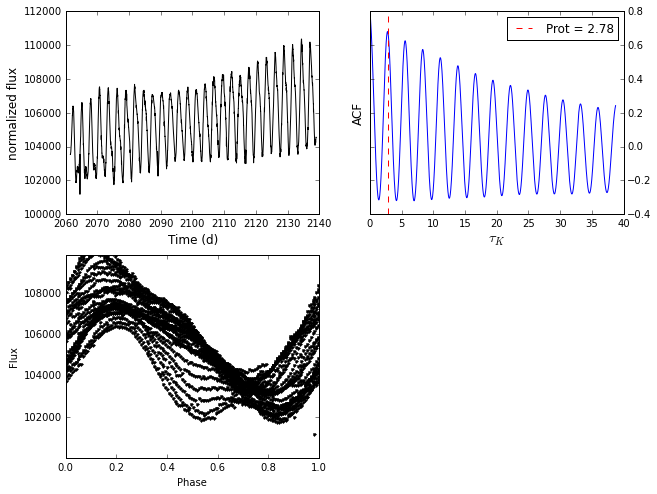

In [47]:
t, y, dy = hypra.prot.fix_kepler.fill_gaps(light_curve.time,
                                           light_curve.flux,
                                           light_curve.unc_flux)
plt.figure(figsize=(10,4))
plt.plot(t,y,'r.')
hypra.prot.time_series.run_acf(t, y, plot=True)

Not so much (though I can see the correct peak, it's just not being selected, so maybe my ACF code just needs more optimization than I made time for last fall)

I am heartened by the fact that the 6-hour period is not showing up as the dominant correlation lag, though the jagged shape does change sufficiently enough that maybe that should be less surprising.

One more! Just that subsection again

2.7787302399556211

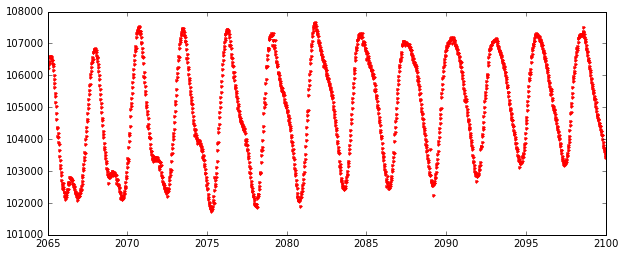

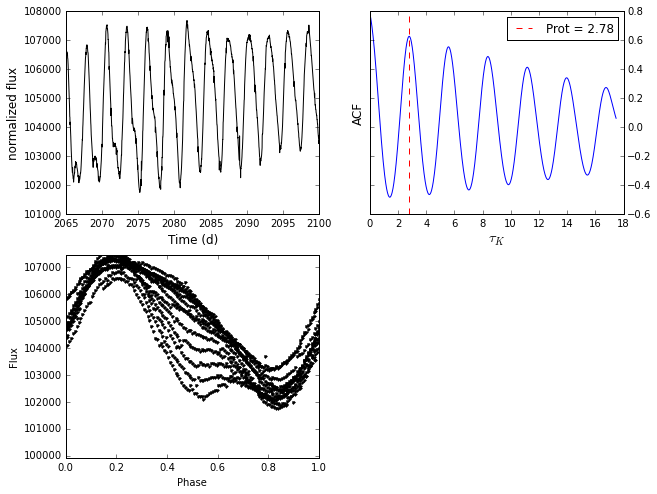

In [48]:
y = y[(t>2065) & (t<2100)]
dy = dy[(t>2065) & (t<2100)]
t = t[(t>2065) & (t<2100)]

plt.figure(figsize=(10,4))
plt.plot(t,y,'r.')
hypra.prot.time_series.run_acf(t, y, plot=True)

In [49]:
lc_dir = "/home/stephanie/code/python/k2spin/lcs/"
#filename = "EPIC_202521690_xy_ap5.0_3.0_fixbox.dat"
filename = "EPIC_203033414_xy_ap5.0_3.0_fixbox.dat"


lc_out = k2io.read_double_aperture(lc_dir+filename)
time, fluxes, unc_fluxes, x_pos, y_pos, qual_flux, apertures = lc_out
    
light_curve = lc.LightCurve(time, fluxes[1], unc_fluxes[1], x_pos, y_pos,
                                name=filename[:-4])
#light_curve.choose_initial()
#light_curve.correct_and_fit()

15.221646299867189

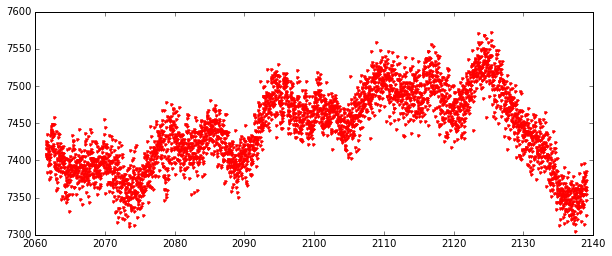

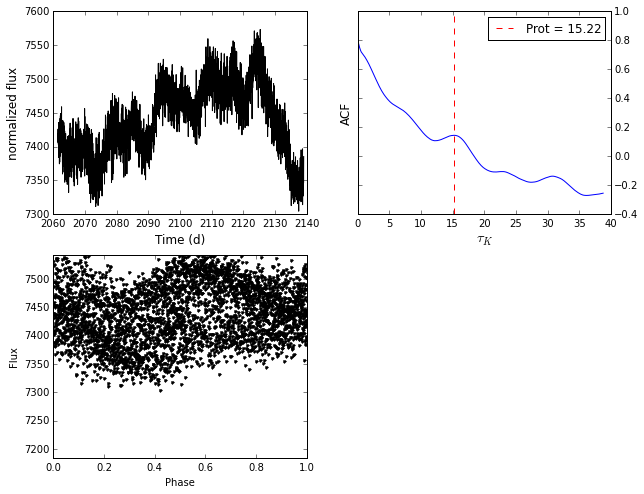

In [50]:
t, y, dy = hypra.prot.fix_kepler.fill_gaps(light_curve.time,
                                           light_curve.flux,
                                           light_curve.unc_flux)
plt.figure(figsize=(10,4))
plt.plot(t,y,'r.')
hypra.prot.time_series.run_acf(t, y, plot=True)

No local minima to the right of any local maxima


-1

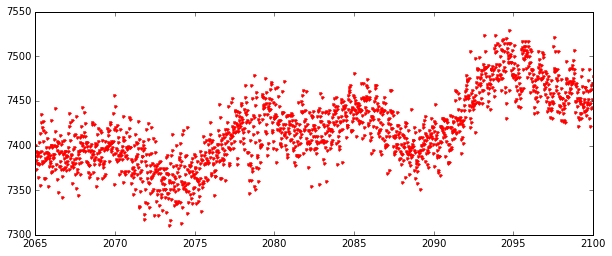

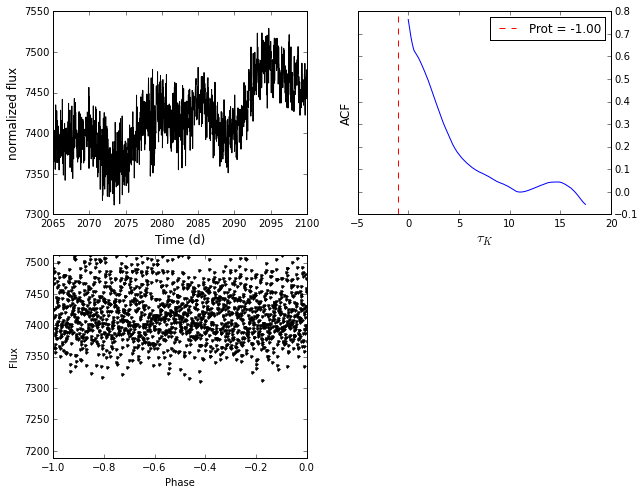

In [51]:
y = y[(t>2065) & (t<2100)]
dy = dy[(t>2065) & (t<2100)]
t = t[(t>2065) & (t<2100)]

plt.figure(figsize=(10,4))
plt.plot(t,y,'r.')
hypra.prot.time_series.run_acf(t, y, plot=True)